<B><h1 style="text-align:center;"> Import </h1></B>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<B><h1 style="text-align:center;"> Upload datasets </h1></B>

In [2]:
ratings = pd.read_csv('rating.csv')
anime   = pd.read_csv('anime.csv')

<b><h1 style="text-align:center; color:green" id="EDA"> EDA part </h1></b>
<b><h3 style="text-align:center;"> Preview Ratings dataset </h3></b>

In [3]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


Replacing "rating" column with "user_rating" because the anime dataset already has "rating column". Looking for merging them.

In [4]:
ratings['user_rating'] = ratings['rating']
ratings.drop('rating', axis=1, inplace = True)
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


<h3 style="text-align:center;"> Preview Anime dataset </h3>

In [5]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


<h3 style="text-align:center;"> View the number of rows and columns in our dataset </h3>

In [6]:
print(f'Shape of ratings:{ratings.shape}\nShape of anime:{anime.shape}')

Shape of ratings:(7813737, 3)
Shape of anime:(12294, 7)


<h3 style="text-align:center;"> View the number of unique values foreach column </h3>

In [7]:
anime.nunique()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64

<h3 style="text-align:center;"> "name" column analysis </h3>

In [8]:
anime['name'].isna().sum()

0

In [9]:
anime[anime.duplicated(['name'])]

,anime_id,name,genre,type,episodes,rating,members
10338,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
11774,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [10]:
anime[(anime['name'] == 'Saru Kani Gassen')|(anime['name'] == 'Shi Wan Ge Leng Xiaohua')]

,anime_id,name,genre,type,episodes,rating,members
8676,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10338,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
11772,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
11774,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


<h3 style="text-align:center;"> "genre column analysis" </h3>

In [11]:
anime['genre'].isna().sum()

62

In [12]:
anime['genre'].value_counts().sort_values(ascending=False).head(20)

Hentai                   823
Comedy                   523
Music                    301
Kids                     199
Comedy, Slice of Life    179
Dementia                 137
Fantasy, Kids            128
Fantasy                  114
Comedy, Kids             112
Drama                    107
Drama, Kids              105
Slice of Life             99
Kids, Music               95
Comedy, Fantasy, Kids     81
Adventure, Kids           80
Adventure                 79
Adventure, Fantasy        78
Action, Mecha, Sci-Fi     77
Comedy, Parody            74
Historical                68
Name: genre, dtype: int64

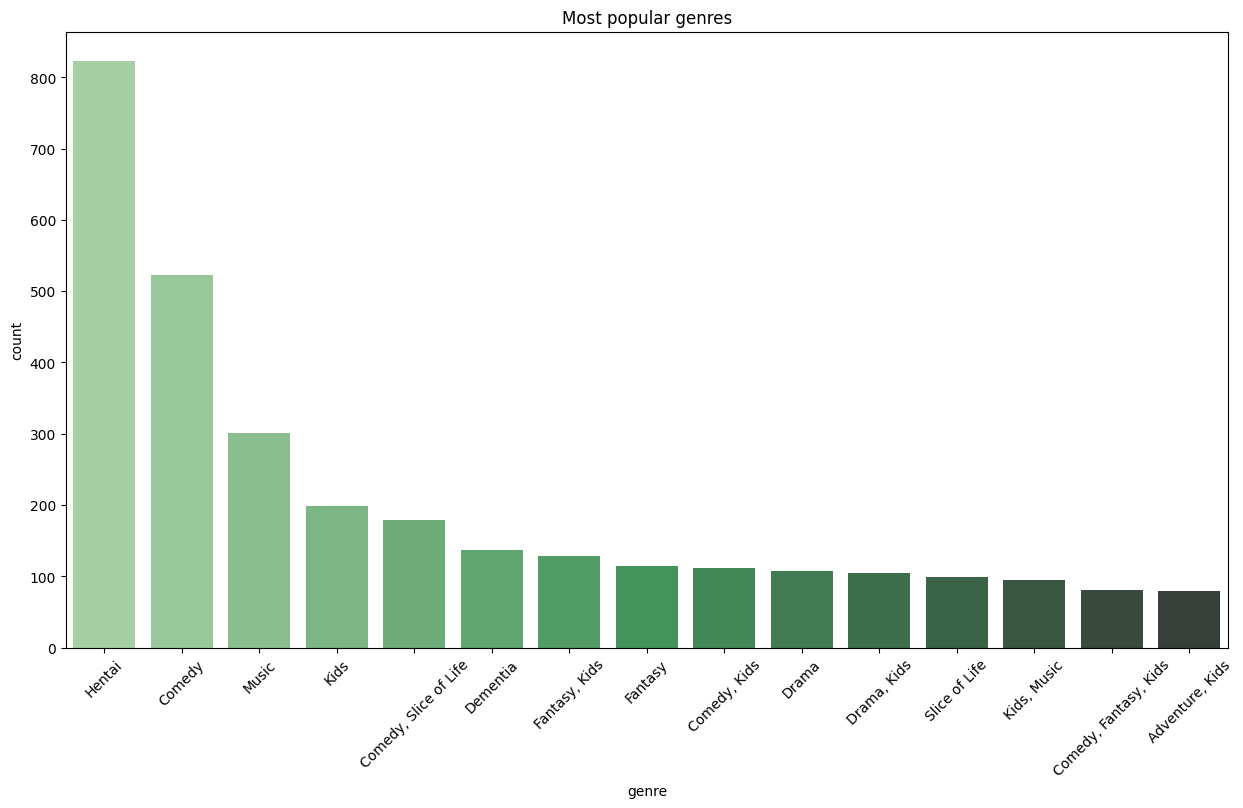

In [13]:
plt.figure(figsize=(15, 8))
plt.title('Most popular genres')
sns.countplot(x='genre', data=anime, palette="Greens_d", order=anime['genre'].value_counts().iloc[:15].index)
plt.xticks(rotation=45)
plt.show()

<b><h3 style="text-align:center;"> "type" column analysis </h3></b>

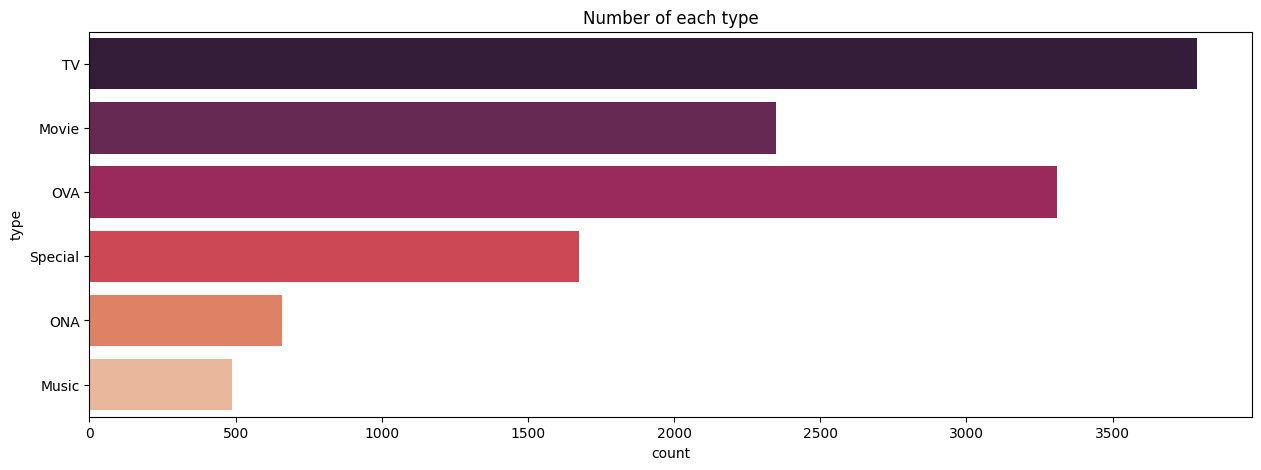

In [14]:
plt.figure(figsize=(15, 5))
plt.title('Number of each type')
sns.countplot(y='type', data=anime, palette='rocket')
plt.show()

<b><h3 style="text-align:center;"> "rating" column analysis</h3></b>

In [15]:
anime.dropna(inplace=True)

In [16]:
anime['rating'].value_counts().sort_values(ascending=False).head(15)

6.00    141
7.00     98
6.50     90
6.25     84
5.00     76
6.75     72
6.67     68
6.38     67
6.80     67
5.67     66
6.73     64
7.33     64
6.34     63
6.81     63
7.25     62
Name: rating, dtype: int64

In [17]:
anime['rating'].isna().sum()

0

In [18]:
anime['rounded_rating'] = anime['rating'].apply(lambda x: round(x))
anime.head()

,anime_id,name,genre,type,episodes,rating,members,rounded_rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,9
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,8
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,8
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905,7
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848,7


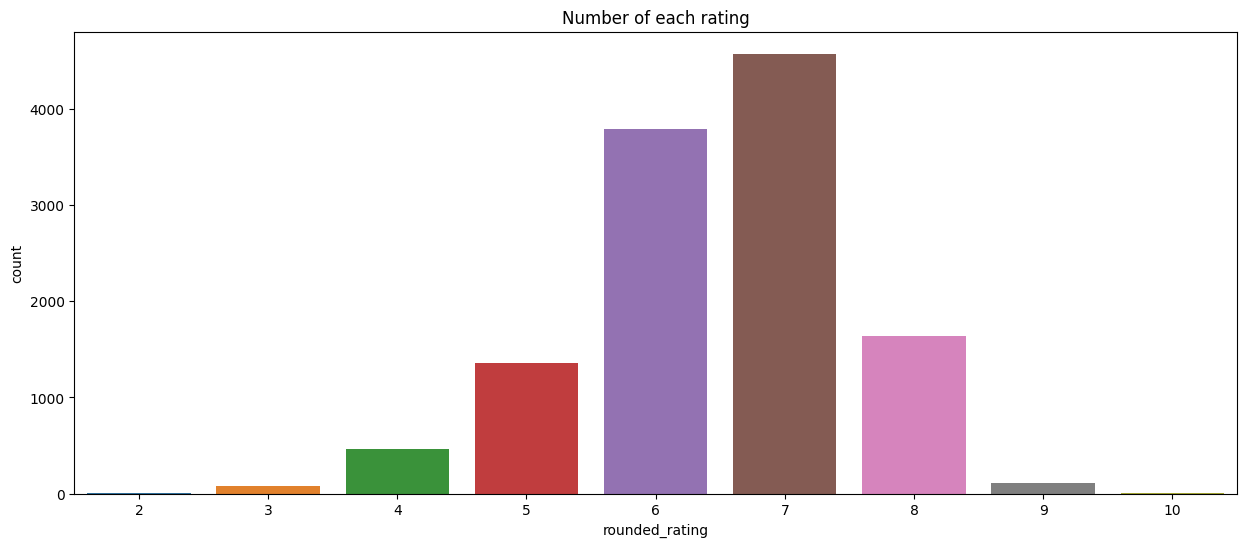

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(data=anime, x='rounded_rating')
plt.title('Number of each rating')
plt.show()

In [20]:
ratings.head()

,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


When the users didn't leave rating it was set to -1, so lets drop them

In [21]:
ratings['user_rating'] = ratings['user_rating'].apply(lambda x: np.nan if x == -1 else x)
ratings.dropna(inplace=True)
ratings.head()

,user_id,anime_id,user_rating
47,1,8074,10.0
81,1,11617,10.0
83,1,11757,10.0
101,1,15451,10.0
153,2,11771,10.0


Getting the average user rating to each anime

In [22]:
user_ratings = ratings.groupby(['anime_id'], as_index=False)['user_rating'].mean()

Merging datasets

In [23]:
anime_user_rating = pd.merge(anime, user_ratings, on='anime_id')

In [24]:
anime_user_rating.head(3)

,anime_id,name,genre,type,episodes,rating,members,rounded_rating,user_rating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824,9,8.869433
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636,8,8.439724
2,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069,8,8.419393


Recommendation engine without GUI 


In [25]:
def calculate_cosine_similarity(anime_user_rating):
    # Calculate cosine similarity here and assign it to 'cs'
    cs = 0.85  # Replace with the actual cosine similarity value

    return cs  # Now 'cs' is defined and can be returned


In [26]:
columns = ['name', 'genre', 'type', 'rating', 'user_rating']
anime_user_rating[columns].isna().sum()

def get_important_features(data):
    important_features = []
    for i in range(0, data.shape[0]):
        important_features.append(data['name'][i] + ' ' + data['genre'][i] + ' ' + data['type'][i] + ' ' + str(data['rating'][i]) + ' ' + str(data['user_rating'][i]))
                   
    return important_features

anime_user_rating['important_features'] = get_important_features(anime_user_rating)
anime_user_rating.head(3)

cm = CountVectorizer().fit_transform(anime_user_rating['important_features'])
cs = cosine_similarity(cm)

title = input("Enter an anime title for recommendations: ")  # Prompt the user to enter an anime title
anime_id_series = anime_user_rating[anime_user_rating['name'] == title]['anime_id']

if not anime_id_series.empty:
    anime_id = anime_id_series.values[0]

    scores = list(enumerate(cs[anime_id]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    sorted_scores = sorted_scores[1:]
    j = 0
    print(f'The 5 most recommended anime to {title} are:\n')
    for item in sorted_scores:
        anime_id = item[0]
        anime_details = anime_user_rating[anime_user_rating['anime_id'] == anime_id]
        if not anime_details.empty:
            movie_title = anime_details['name'].values[0]
            anime_genre = anime_details['genre'].values[0]
            anime_type = anime_details['type'].values[0]
            episodes = anime_details['episodes'].values[0]
            rating = anime_details['rating'].values[0]
            members = anime_details['members'].values[0]

            print(f"{j + 1} {movie_title} - Genre: {anime_genre}, Type: {anime_type}, Episodes: {episodes}, Rating: {rating}, Members: {members}")
            j += 1
            if j > 4:
                break
else:
    print(f"Anime title '{title}' not found in the dataset.")


Enter an anime title for recommendations: Naruto
The 5 most recommended anime to Naruto are:

1 Monster - Genre: Drama, Horror, Mystery, Police, Psychological, Seinen, Thriller, Type: TV, Episodes: 74, Rating: 8.72, Members: 247562
2 Shakugan no Shana SP: Koi to Onsen no Kougai Gakushuu! - Genre: Comedy, Ecchi, Fantasy, Romance, Slice of Life, Type: OVA, Episodes: 1, Rating: 7.28, Members: 26234
3 Yawara! - Genre: Action, Comedy, Drama, Martial Arts, Romance, Slice of Life, Sports, Type: TV, Episodes: 124, Rating: 7.63, Members: 6437
4 Kashi no Ki Mokku - Genre: Adventure, Fantasy, Type: TV, Episodes: 52, Rating: 5.91, Members: 787
5 Hi no Ame ga Furu - Genre: Drama, Historical, Type: Movie, Episodes: 1, Rating: 7.55, Members: 513


Added GUI interface


In [ ]:
import tkinter as tk
from tkinter import ttk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset and perform any necessary preprocessing
# ...

# Function to calculate cosine similarity matrix
def calculate_cosine_similarity(data):
    # ...
    # Implement the logic to calculate cosine similarity based on your dataset
    # ...
    return cs

# Create the main application window
root = tk.Tk()
root.title("Anime Recommendation System")

# Create and configure the input label and entry
title_label = tk.Label(root, text="Enter an anime title for recommendations:")
title_label.pack()

title_entry = tk.Entry(root)
title_entry.pack()

# Function to handle the recommendation logic
def recommend_anime():
    title = title_entry.get()
    anime_id_series = anime_user_rating[anime_user_rating['name'] == title]['anime_id']

    if not anime_id_series.empty:
        anime_id = anime_id_series.values[0]

        # Calculate the cosine similarity matrix
        cs = calculate_cosine_similarity(anime_user_rating)

        scores = list(enumerate(cs[anime_id]))
        sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[:5]  # Get the top 5 recommendations

        # Clear the table
        for item in recommendations_table.get_children():
            recommendations_table.delete(item)

        for j, item in enumerate(sorted_scores):
            anime_id = item[0]
            anime_details = anime_user_rating[anime_user_rating['anime_id'] == anime_id]
            if not anime_details.empty:
                movie_title = anime_details['name'].values[0]
                anime_genre = anime_details['genre'].values[0]
                anime_type = anime_details['type'].values[0]
                episodes = anime_details['episodes'].values[0]
                rating = anime_details['rating'].values[0]
                members = anime_details['members'].values[0]

                recommendations_table.insert('', 'end', values=[j + 1, movie_title, anime_genre, anime_type, episodes, rating, members])

    else:
        # Clear the table
        for item in recommendations_table.get_children():
            recommendations_table.delete(item)
        recommendation_text.config(text=f"Anime title '{title}' not found in the dataset.")

# Create and configure the recommendation button
recommend_button = tk.Button(root, text="Get Recommendations", command=recommend_anime)
recommend_button.pack()

# Create and configure the recommendation result table
recommendations_table = ttk.Treeview(root, columns=('Rank', 'Title', 'Genre', 'Type', 'Episodes', 'Rating', 'Members'), show="headings")
recommendations_table.heading('#1', text='Rank')
recommendations_table.heading('#2', text='Title')
recommendations_table.heading('#3', text='Genre')
recommendations_table.heading('#4', text='Type')
recommendations_table.heading('#5', text='Episodes')
recommendations_table.heading('#6', text='Rating')
recommendations_table.heading('#7', text='Members')
recommendations_table.pack()

# Set the background color to blue
recommendations_table.tag_configure('blue', background='blue')

# Start the GUI application
root.mainloop()


In [ ]:
use this anime names as input
##

Cowboy Bebop
Cowboy Bebop: Tengoku no Tobira
Trigun
Witch Hunter Robin
Beet the Vandel Buster
Eyeshield 21
Hachimitsu to Clover
Hungry Heart: Wild Striker
Initial D Fourth Stage
School Rumble
Naruto
One Piece
Prince of Tennis
Ring ni Kakero 1
School Rumble
Sunabouzu
Texhnolyze
Trinity Blood
Yakitate!! Japan
Zipang